In [310]:
# Import required libraries
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Woodchips data
BASE_DIR = Path(os.getcwd()).parents[2]  # Get root directory
FILE_PATH = BASE_DIR / "backend/data/Cleaned/WoodChips.csv"
woodchips_df = pd.read_csv(FILE_PATH)

# Set display options for better readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Melt the dataframe to convert months to rows for easier analysis
woodchips_melted = woodchips_df.melt(id_vars=['object_name'], 
                                    var_name='month', 
                                    value_name='consumption')

# Calculate descriptive statistics for each building
building_stats = woodchips_melted.groupby('object_name')['consumption'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max'),
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75),
    lambda x: x.skew(),
    lambda x: x.kurtosis()
]).round(2)

building_stats.columns = ['count','mean', 'std', 'min', 'max', 'q25', 'q75', 'skewness', 'kurtosis']

print("\nDescriptive Statistics for Individual Buildings:\n")
print(building_stats)

# Calculate total consumption statistics
total_monthly_consumption = woodchips_melted.groupby('month')['consumption'].sum()

total_stats = {
    'Total Mean Monthly Consumption': total_monthly_consumption.mean(),
    'Total Standard Deviation': total_monthly_consumption.std(),
    'Minimum Total Monthly': total_monthly_consumption.min(),
    'Maximum Total Monthly': total_monthly_consumption.max(),
    'Total Consumption': total_monthly_consumption.sum()
}

print("\nOverall Statistics:")
for stat, value in total_stats.items():
    print(f"{stat}: {value:,.2f}")



Descriptive Statistics for Individual Buildings:

                                       count      mean       std      min  \
object_name                                                                 
F622 Psychology wood boiler               34  51085.29  25559.88     0.00   
F916 College of Education wood boiler     34 139073.53 113228.53     0.00   
H538 Childcare boiler                     34  55385.29  17486.30 25680.00   
H633 Arana Boiler                         34  79700.00  75906.00     0.00   
J122 Carrington Jenkins boiler            34  10493.22  12197.89     0.00   

                                            max      q25       q75  skewness  \
object_name                                                                    
F622 Psychology wood boiler            87470.00 37825.00  73197.50     -0.46   
F916 College of Education wood boiler 342800.00 17925.00 225150.00      0.13   
H538 Childcare boiler                  82640.00 42382.50  70612.50     -0.27   
H633 Aran

/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_95990/844848365.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_95990/844848365.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


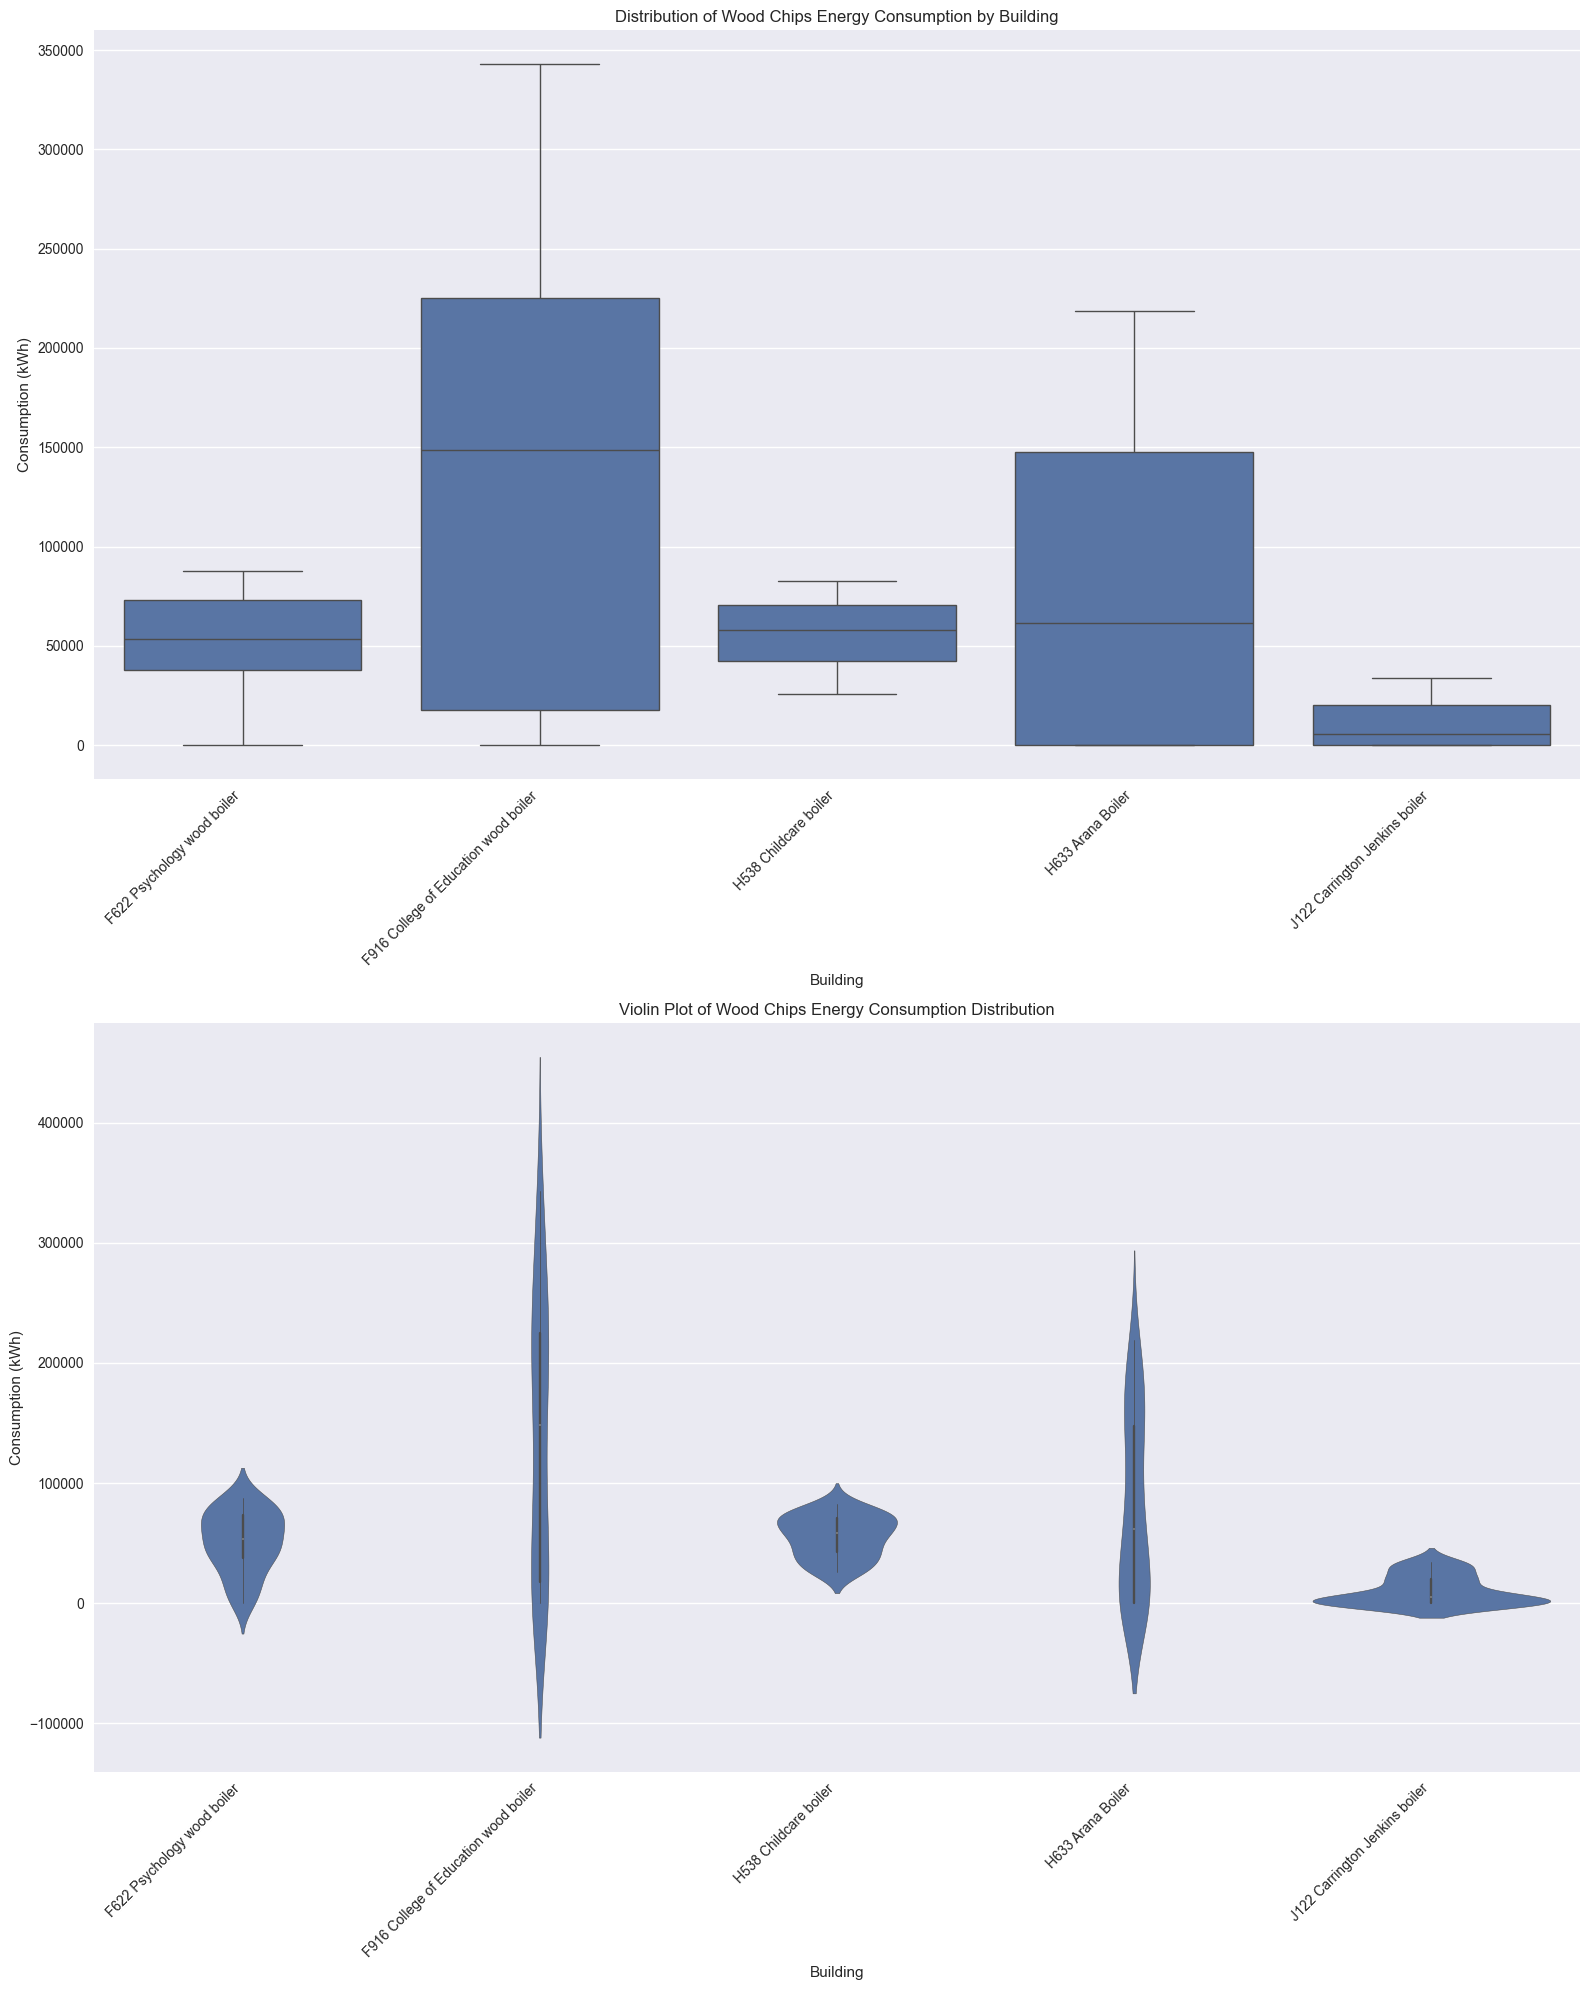

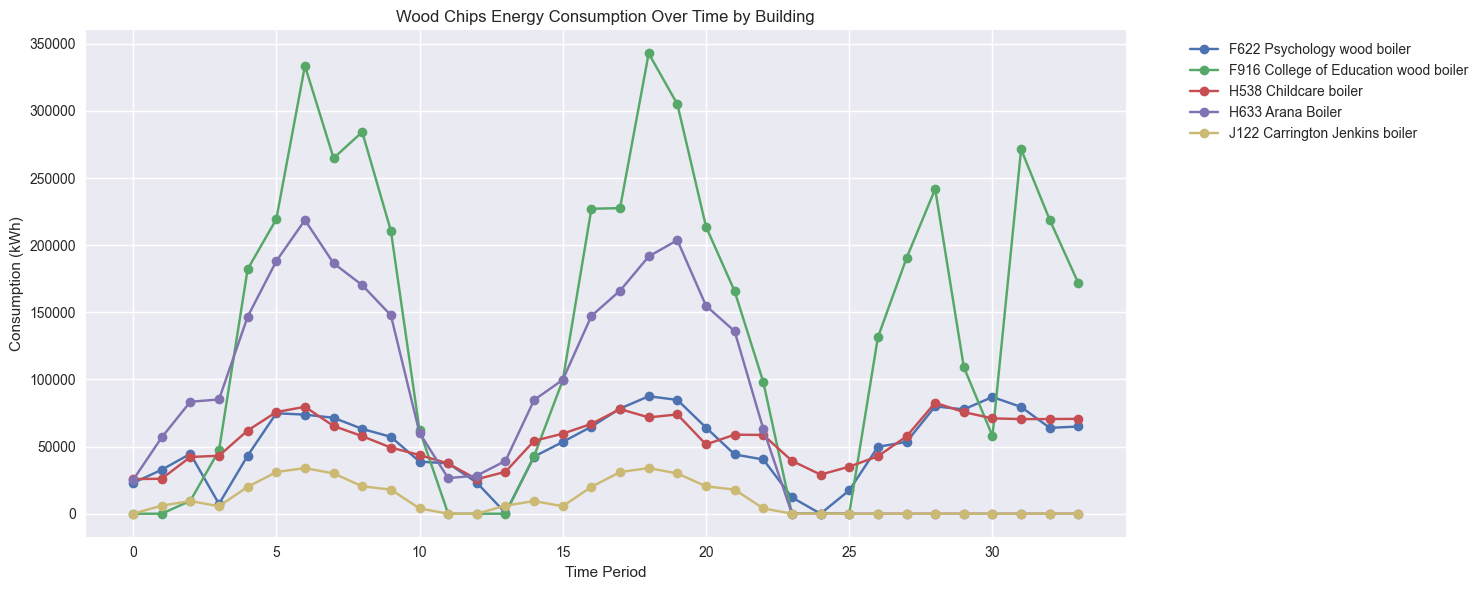

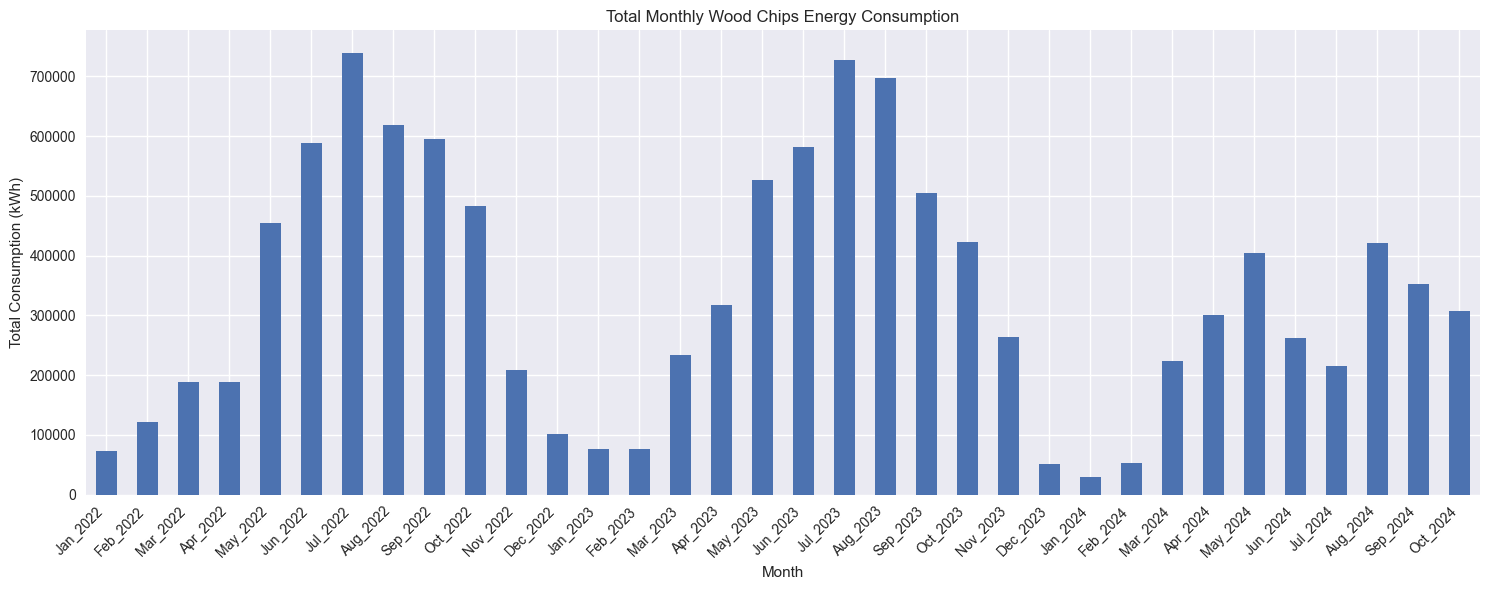

In [315]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)

# Distribution Analysis - Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))

# 1. Box Plot
sns.boxplot(data=woodchips_df.melt(id_vars=['object_name'], 
                                  var_name='month', 
                                  value_name='consumption'), 
            x='object_name', 
            y='consumption',
            ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title('Distribution of Wood Chips Energy Consumption by Building')
ax1.set_ylabel('Consumption (kWh)')
ax1.set_xlabel('Building')

# 2. Violin Plot
sns.violinplot(data=woodchips_df.melt(id_vars=['object_name'], 
                                     var_name='month', 
                                     value_name='consumption'),
               x='object_name',
               y='consumption',
               ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title('Violin Plot of Wood Chips Energy Consumption Distribution')
ax2.set_ylabel('Consumption (kWh)')
ax2.set_xlabel('Building')

plt.tight_layout()
plt.show()

# Time Series Plot
plt.figure(figsize=(15, 6))
for building in woodchips_df['object_name'].unique():
    values = woodchips_df[woodchips_df['object_name'] == building].iloc[:,1:].values.flatten()
    plt.plot(values, label=building, marker='o')

plt.title('Wood Chips Energy Consumption Over Time by Building')
plt.xlabel('Time Period')
plt.ylabel('Consumption (kWh)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Monthly Total Consumption
monthly_total = woodchips_df.iloc[:,1:].sum()

plt.figure(figsize=(15, 6))
monthly_total.plot(kind='bar')
plt.title('Total Monthly Wood Chips Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Total Consumption (kWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


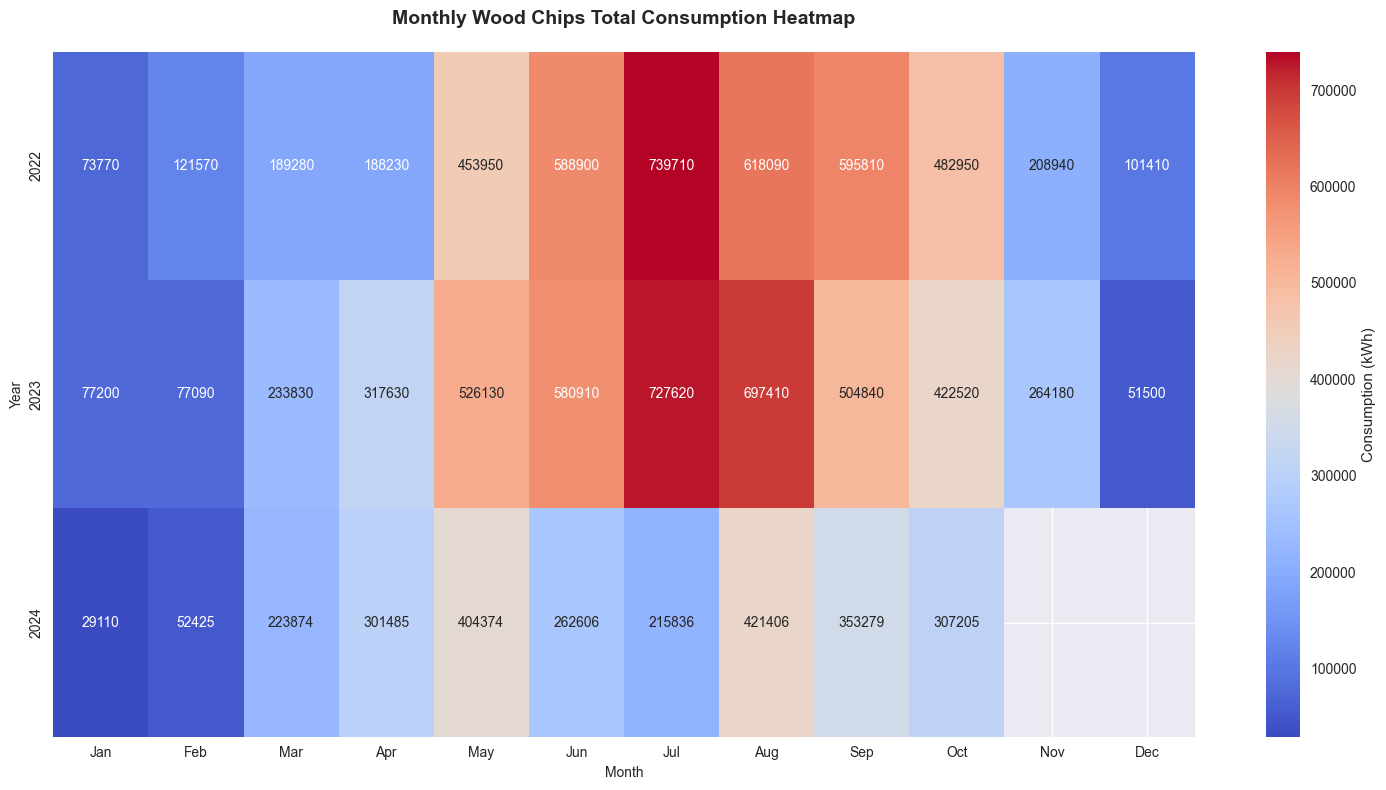

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total consumption for each month
total_consumption = woodchips_df.iloc[:, 1:].sum()

# Create a DataFrame with the shape we want (years x months)
years = [2022, 2023, 2024]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

heatmap_data = []
for year in years:
    row = []
    for month in months:
        col_name = f"{month}_{year}"
        value = total_consumption[col_name] if col_name in total_consumption.index else np.nan
        row.append(value)
    heatmap_data.append(row)

# Create DataFrame for heatmap
heatmap_df = pd.DataFrame(heatmap_data, 
                         index=years,
                         columns=months)

# Create the heatmap with improved visibility
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_df, 
            cmap='coolwarm',  # Changed to coolwarm for better visibility
            annot=True,
            fmt='.0f',
            cbar_kws={'label': 'Consumption (kWh)'},
            annot_kws={'size': 10})

plt.title('Monthly Wood Chips Total Consumption Heatmap', 
          pad=20, 
          fontsize=14, 
          fontweight='bold')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Year', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



Analyzing F622 Psychology wood boiler


/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_95990/998908959.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2022-01-01', periods=len(building_data), freq='M')


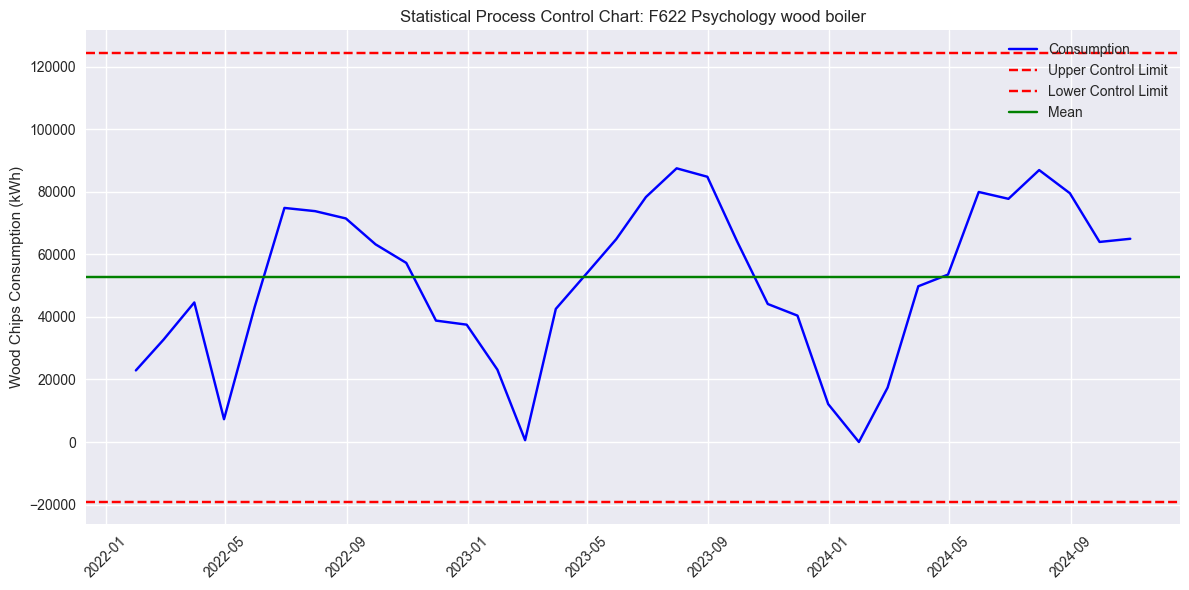

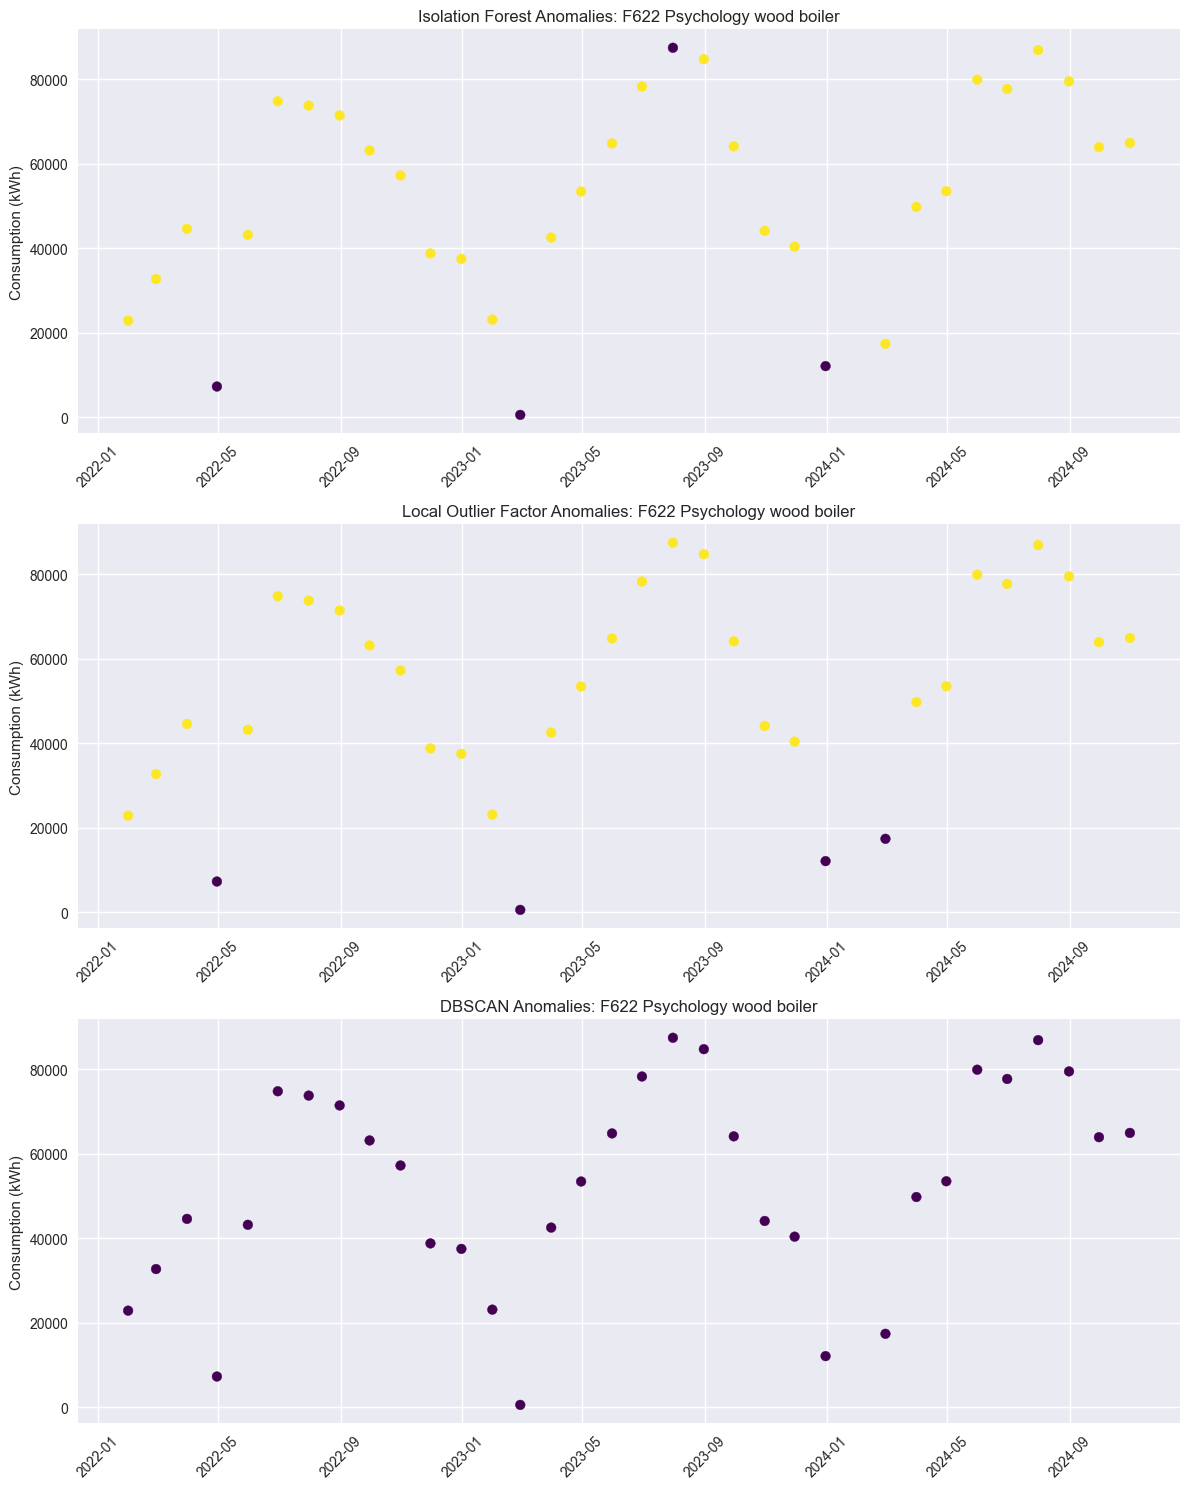


Anomaly Detection Summary for F622 Psychology wood boiler:
Total valid observations: 33
Isolation Forest anomalies: 4 (12.1%)
LOF anomalies: 4 (12.1%)
DBSCAN outliers: 0 (0.0%)

Analyzing F916 College of Education wood boiler


/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_95990/998908959.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2022-01-01', periods=len(building_data), freq='M')


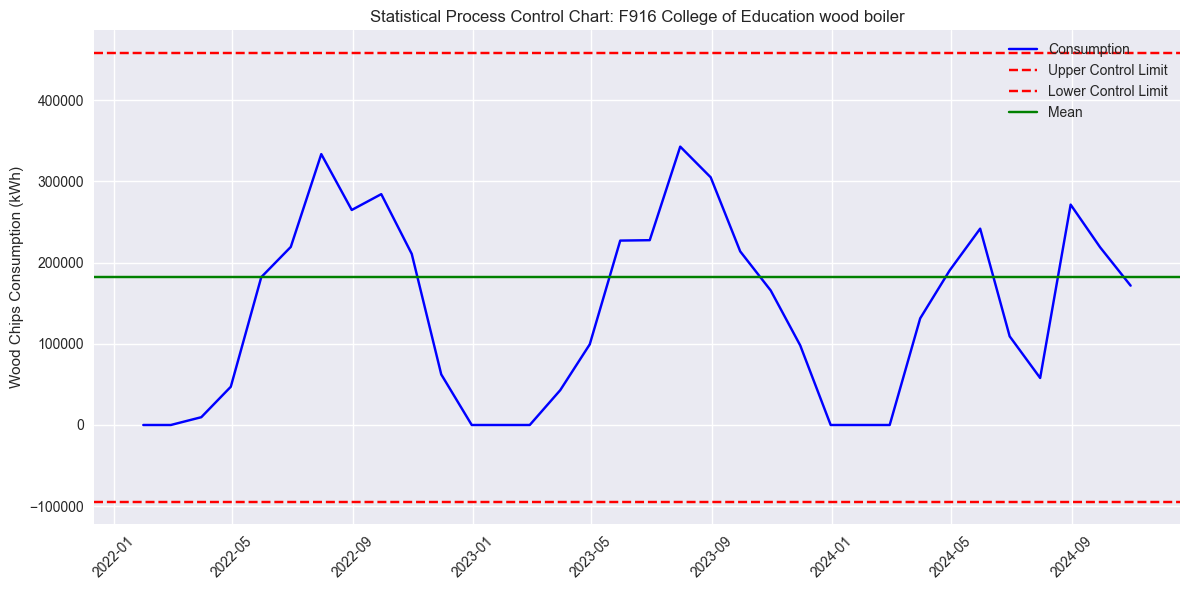

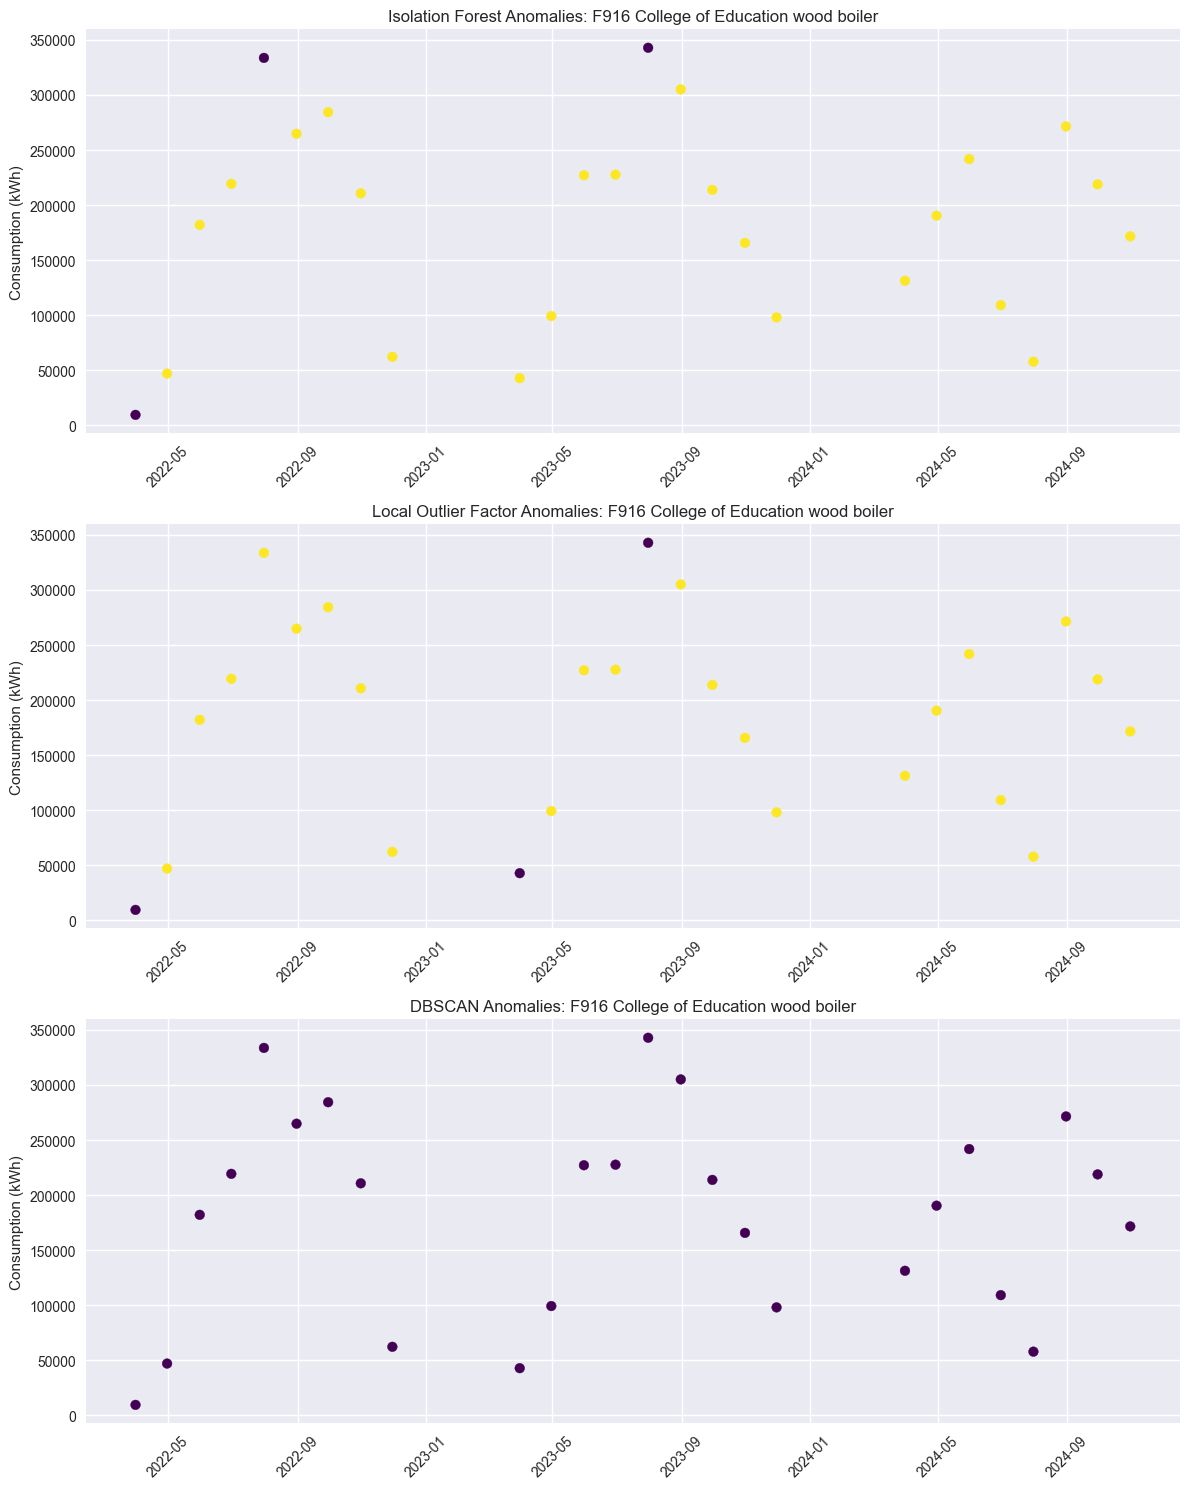


Anomaly Detection Summary for F916 College of Education wood boiler:
Total valid observations: 26
Isolation Forest anomalies: 3 (11.5%)
LOF anomalies: 3 (11.5%)
DBSCAN outliers: 0 (0.0%)

Analyzing H538 Childcare boiler


/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_95990/998908959.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2022-01-01', periods=len(building_data), freq='M')


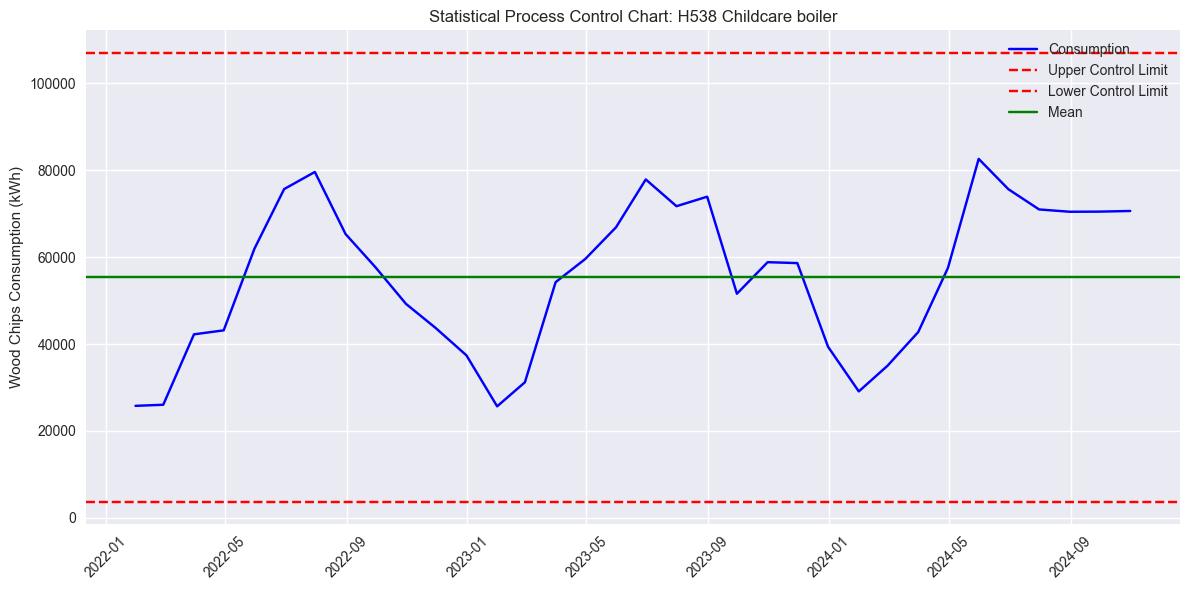

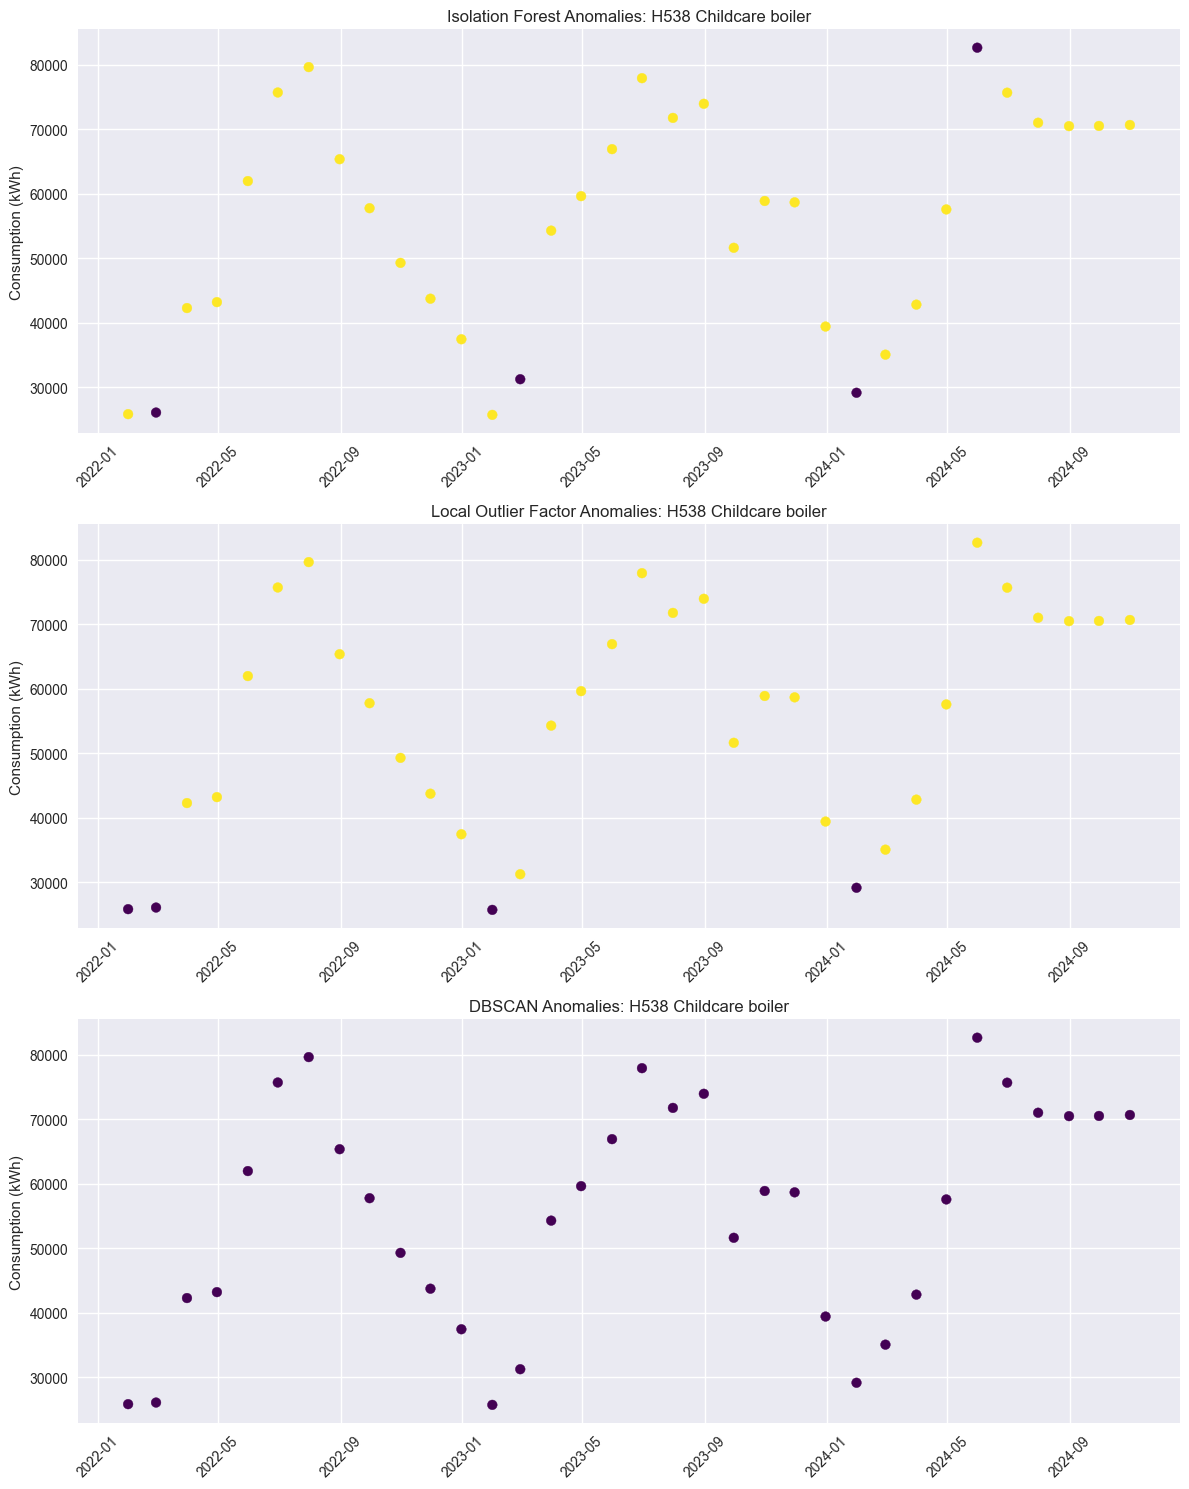


Anomaly Detection Summary for H538 Childcare boiler:
Total valid observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 0 (0.0%)

Analyzing H633 Arana Boiler


/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_95990/998908959.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2022-01-01', periods=len(building_data), freq='M')


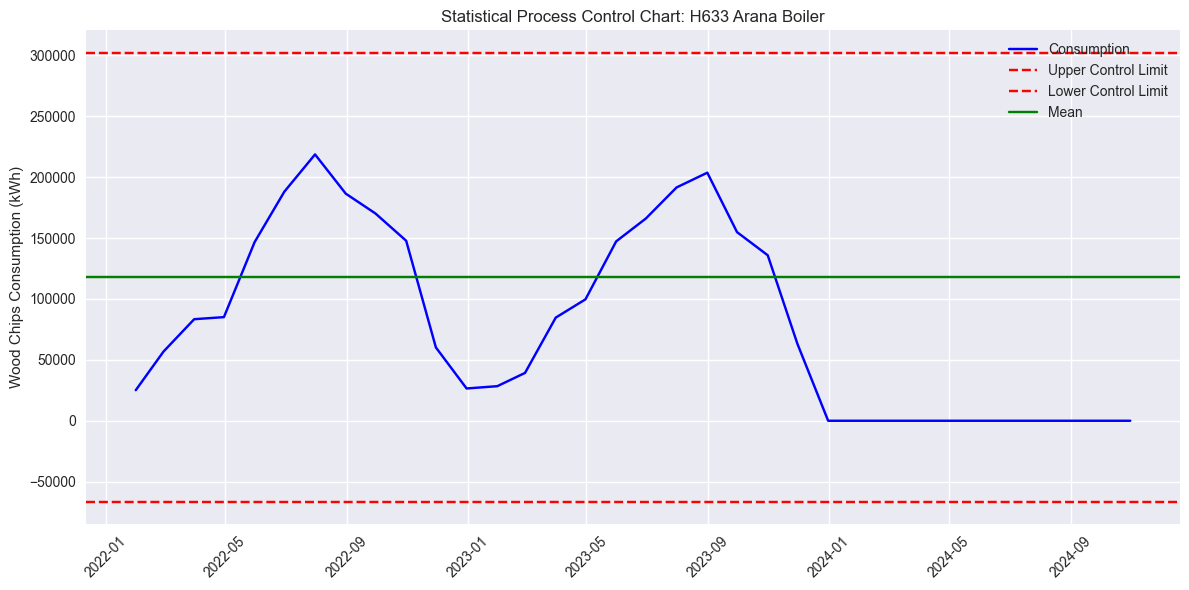

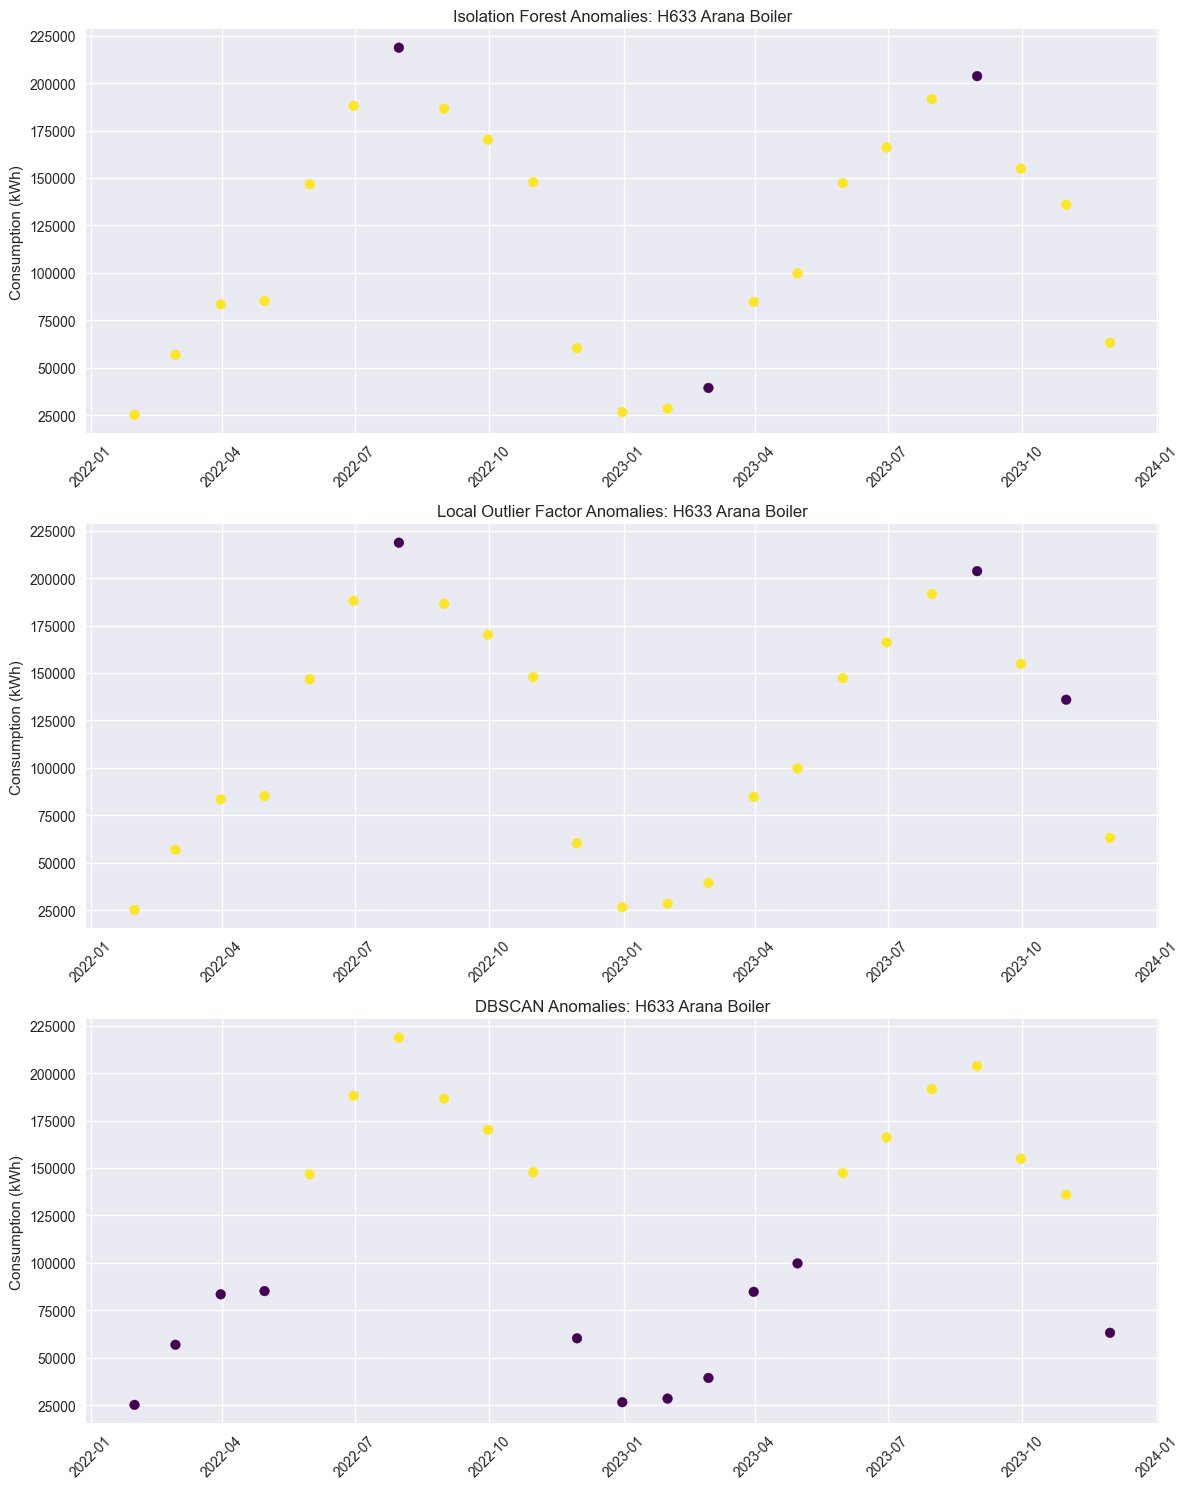


Anomaly Detection Summary for H633 Arana Boiler:
Total valid observations: 23
Isolation Forest anomalies: 3 (13.0%)
LOF anomalies: 3 (13.0%)
DBSCAN outliers: 0 (0.0%)

Analyzing J122 Carrington Jenkins boiler


/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_95990/998908959.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2022-01-01', periods=len(building_data), freq='M')


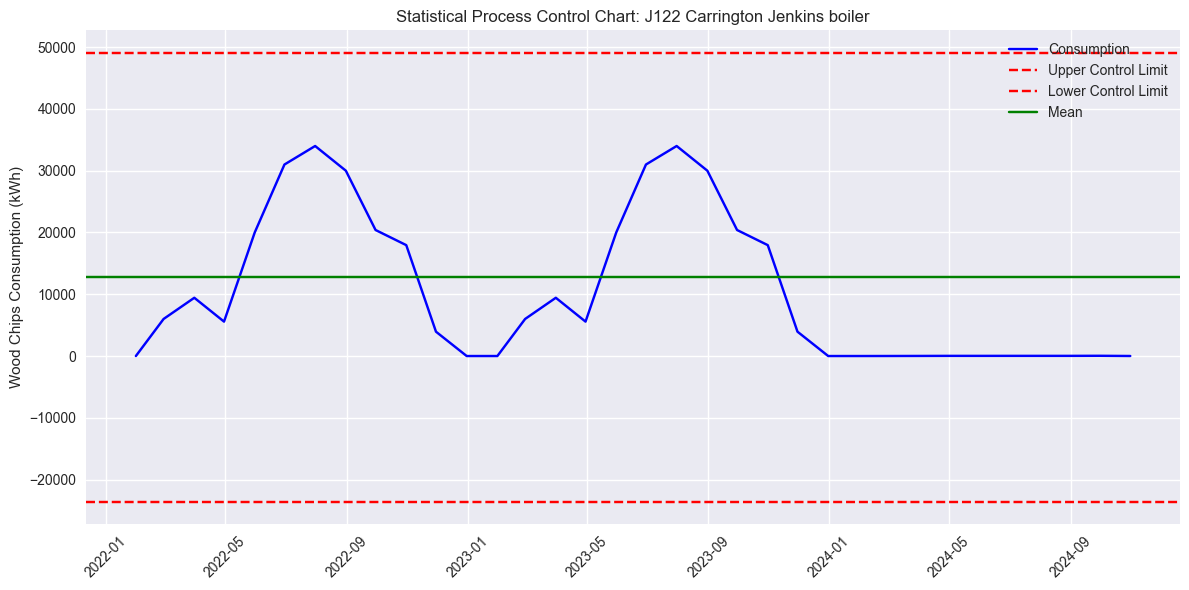

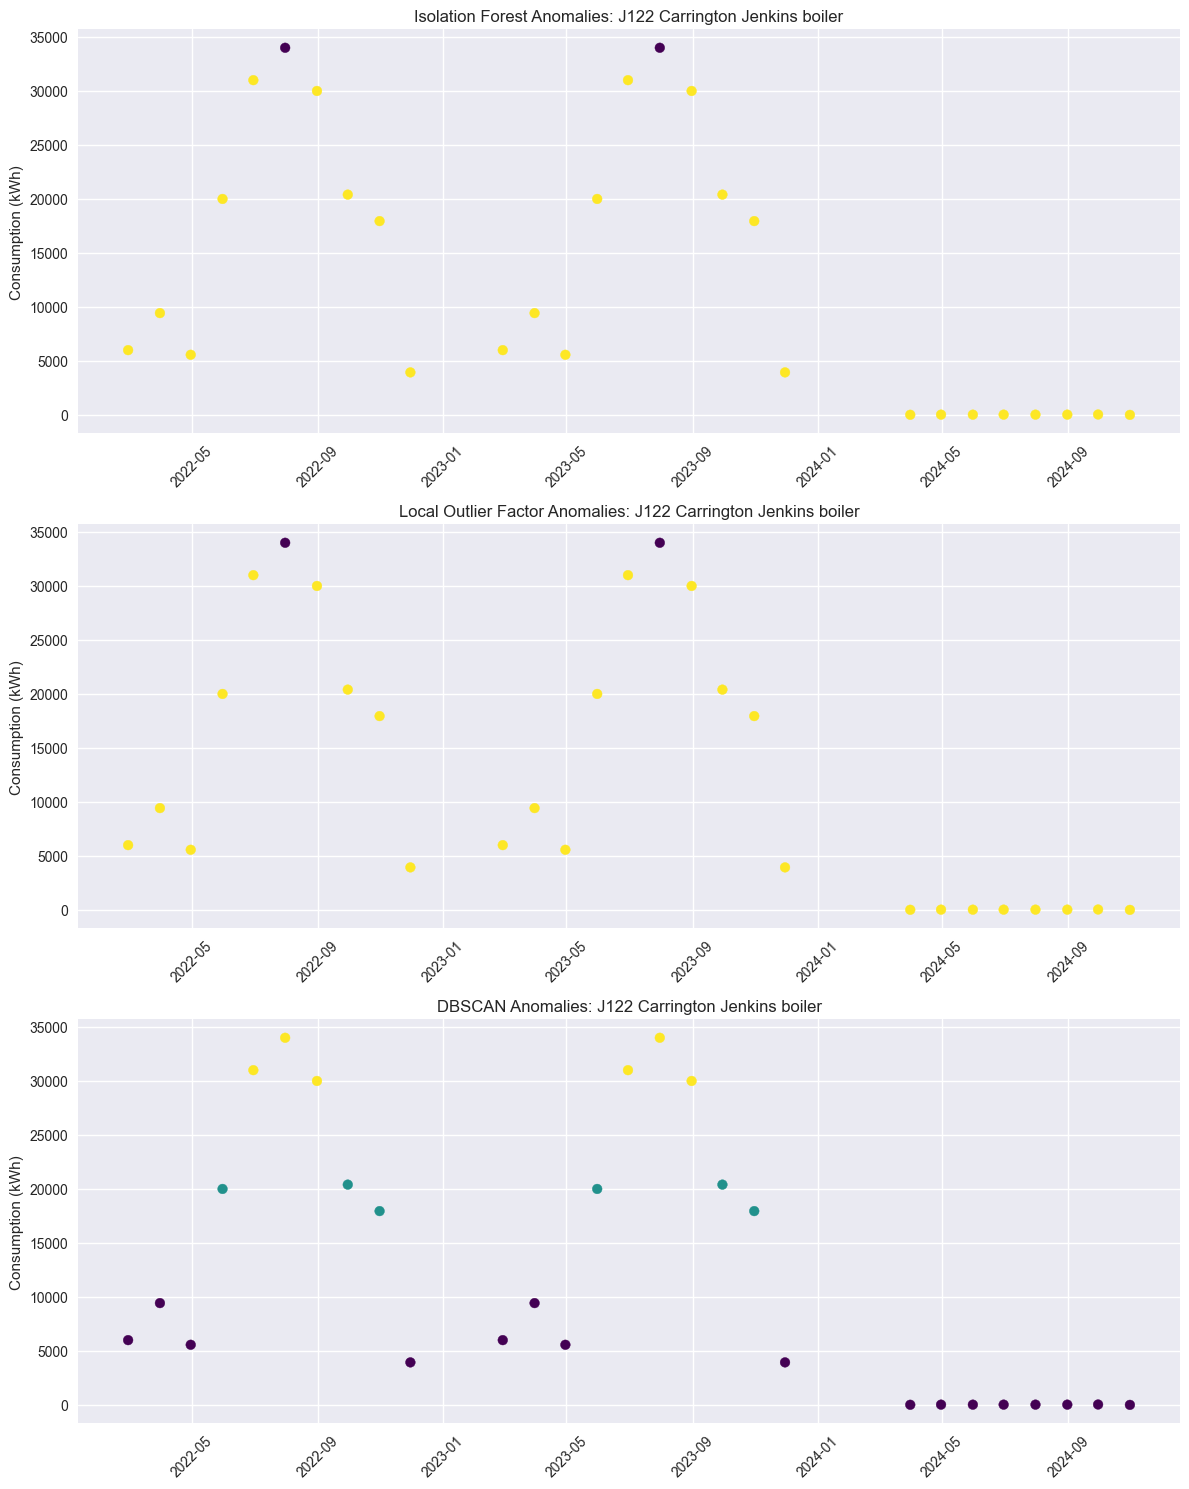


Anomaly Detection Summary for J122 Carrington Jenkins boiler:
Total valid observations: 28
Isolation Forest anomalies: 2 (7.1%)
LOF anomalies: 2 (7.1%)
DBSCAN outliers: 0 (0.0%)

Analyzing Total Consumption


/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_95990/998908959.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2022-01-01', periods=len(building_data), freq='M')


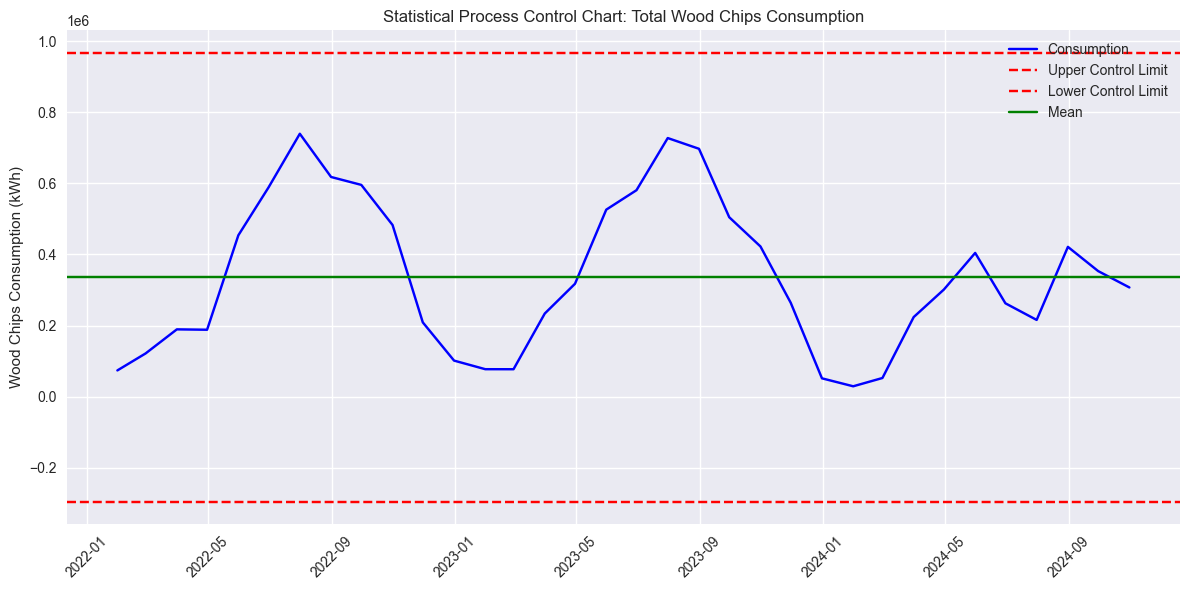

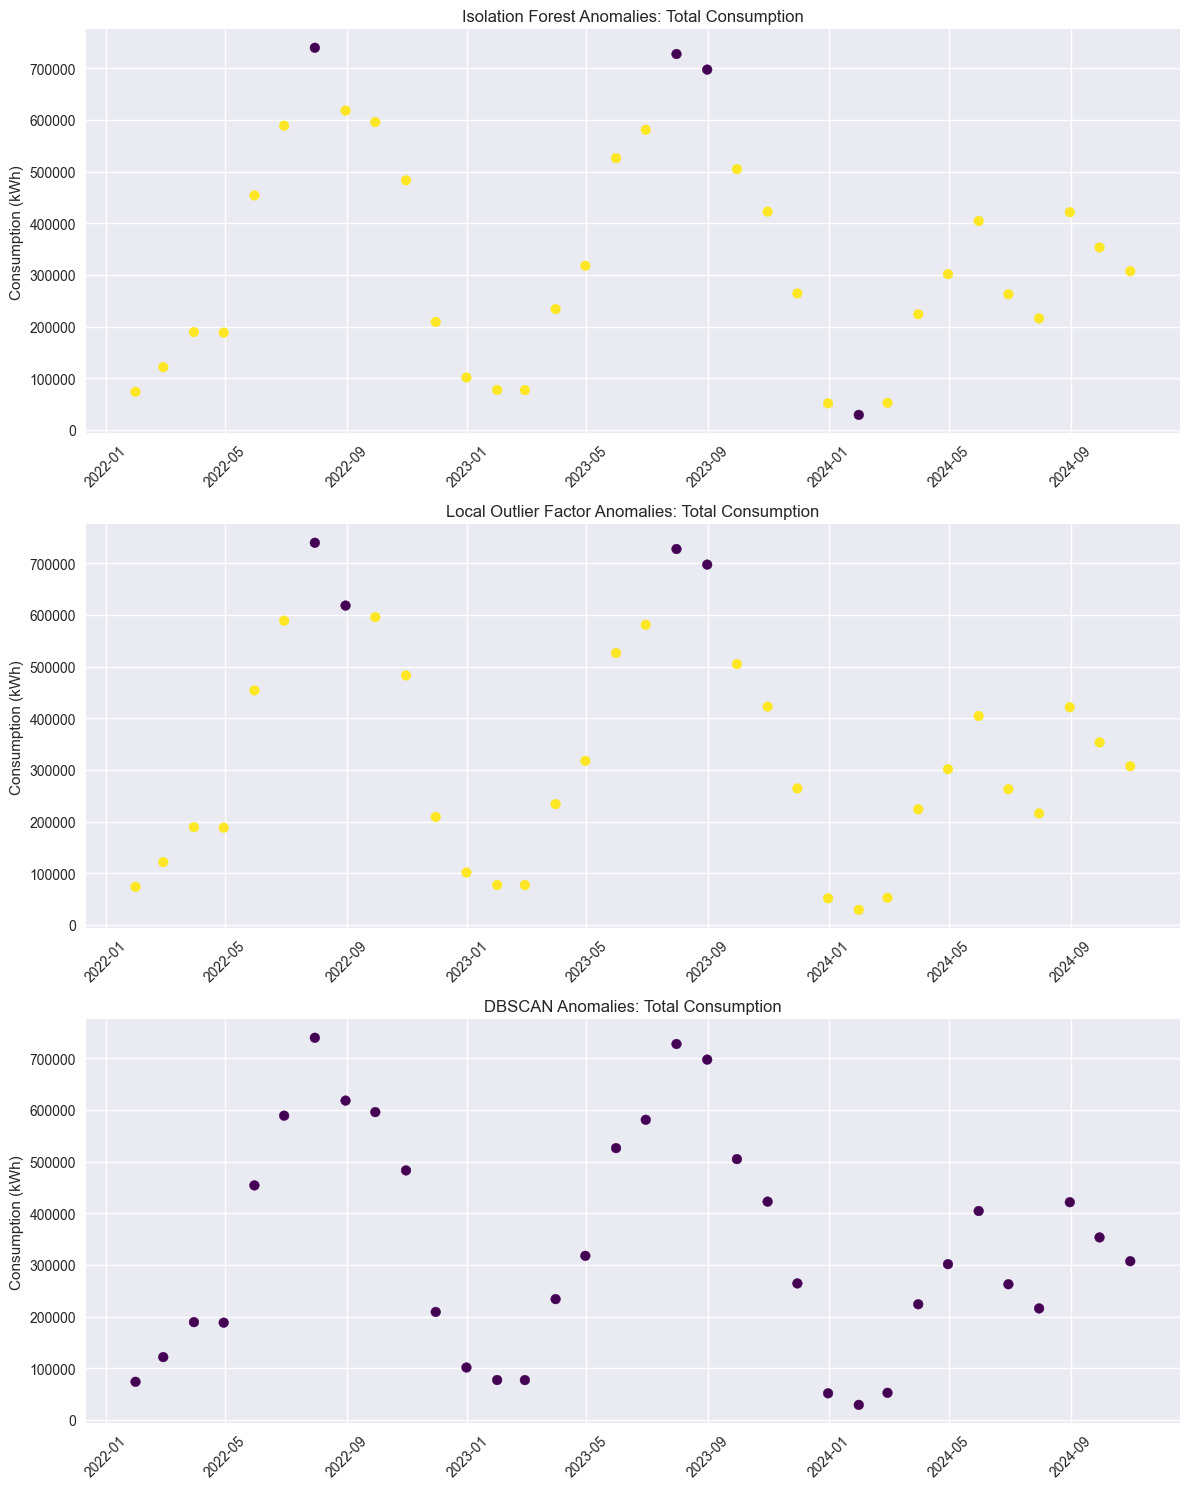


Anomaly Detection Summary for Total Consumption:
Total valid observations: 34
Isolation Forest anomalies: 4 (11.8%)
LOF anomalies: 4 (11.8%)
DBSCAN outliers: 0 (0.0%)


{'iso_forest': array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
 'lof': array([ 1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
 'dbscan': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [157]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

def perform_woodchips_anomaly_detection(data, building_name, is_total=False):
    """Perform anomaly detection for woodchips consumption"""
    
    if is_total:
        # For total consumption, sum all buildings
        building_data = data.iloc[:, 1:].sum().values
        title = "Statistical Process Control Chart: Total Wood Chips Consumption"
    else:
        # For individual buildings
        building_data = data[data['object_name'] == building_name].iloc[:, 1:].values.flatten()
        title = f"Statistical Process Control Chart: {building_name}"
    dates = pd.date_range(start='2022-01-01', periods=len(building_data), freq='M')
    
    # Handle NaN values and create mask for valid data points
    valid_data_mask = ~np.isnan(building_data)  # Remove NaN values
    if not is_total:
        valid_data_mask = valid_data_mask & (building_data != 0)  # Remove zeros for individual buildings
        
        if building_name == "F916 College of Education wood boiler":
            valid_data_mask = valid_data_mask & ~dates.month.isin([1, 2, 12])
        elif building_name == "J122 Carrington Jenkins boiler":
            valid_data_mask = valid_data_mask & ~dates.month.isin([1, 12])
            valid_data_mask = valid_data_mask & ~((dates.year >= 2024) & (dates.month == 2))
    
    # Filter data
    valid_data = building_data[valid_data_mask]
    valid_dates = dates[valid_data_mask]
    
    if len(valid_data) < 3:
        print(f"Insufficient valid data points for {building_name}")
        return None
    
    # Proceed only if we have enough valid data points
    if len(valid_data) < 3:
        print(f"Insufficient valid data points for {building_name}")
        return None
    
    # Statistical Process Control (3-sigma)
    mean = np.mean(valid_data)
    std = np.std(valid_data)
    upper_limit = mean + 3*std
    lower_limit = mean - 3*std
    
    # Plot SPC chart
    plt.figure(figsize=(12, 6))
    plt.plot(dates, building_data, 'b-', label='Consumption')
    plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Control Limit')
    plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Control Limit')
    plt.axhline(y=mean, color='g', linestyle='-', label='Mean')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Wood Chips Consumption (kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    valid_data_reshaped = valid_data.reshape(-1, 1)
    
    # Standardize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(valid_data_reshaped)
    
    # Apply detection methods
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    iso_forest_labels = iso_forest.fit_predict(scaled_data)
    
    lof = LocalOutlierFactor(contamination=0.1)
    lof_labels = lof.fit_predict(scaled_data)
    
    dbscan = DBSCAN(eps=0.5, min_samples=3)
    dbscan_labels = dbscan.fit_predict(scaled_data)
    
    # Plot results
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    
    # Plot detection results
    axes = [ax1, ax2, ax3]
    methods = [
        (iso_forest_labels, 'Isolation Forest'),
        (lof_labels, 'Local Outlier Factor'),
        (dbscan_labels, 'DBSCAN')
    ]
    
    for ax, (labels, title) in zip(axes, methods):
        ax.scatter(valid_dates, valid_data, c=labels, cmap='viridis')
        ax.set_title(f'{title} Anomalies: {building_name}')
        ax.set_ylabel('Consumption (kWh)')
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nAnomaly Detection Summary for {building_name}:")
    print(f"Total valid observations: {len(valid_data)}")
    print(f"Isolation Forest anomalies: {sum(iso_forest_labels == -1)} ({sum(iso_forest_labels == -1)/len(iso_forest_labels)*100:.1f}%)")
    print(f"LOF anomalies: {sum(lof_labels == -1)} ({sum(lof_labels == -1)/len(lof_labels)*100:.1f}%)")
    print(f"DBSCAN outliers: {sum(dbscan_labels == -1)} ({sum(dbscan_labels == -1)/len(dbscan_labels)*100:.1f}%)")
    
    return {
        'iso_forest': iso_forest_labels,
        'lof': lof_labels,
        'dbscan': dbscan_labels
    }

buildings = woodchips_df['object_name'].unique()
for building in buildings:
    print("\n" + "="*50)
    print(f"Analyzing {building}")
    print("="*50)
    perform_woodchips_anomaly_detection(woodchips_df, building)

# Analyze total consumption
print("\n" + "="*50)
print("Analyzing Total Consumption")
print("="*50)
perform_woodchips_anomaly_detection(woodchips_df, 'Total Consumption', is_total=True)


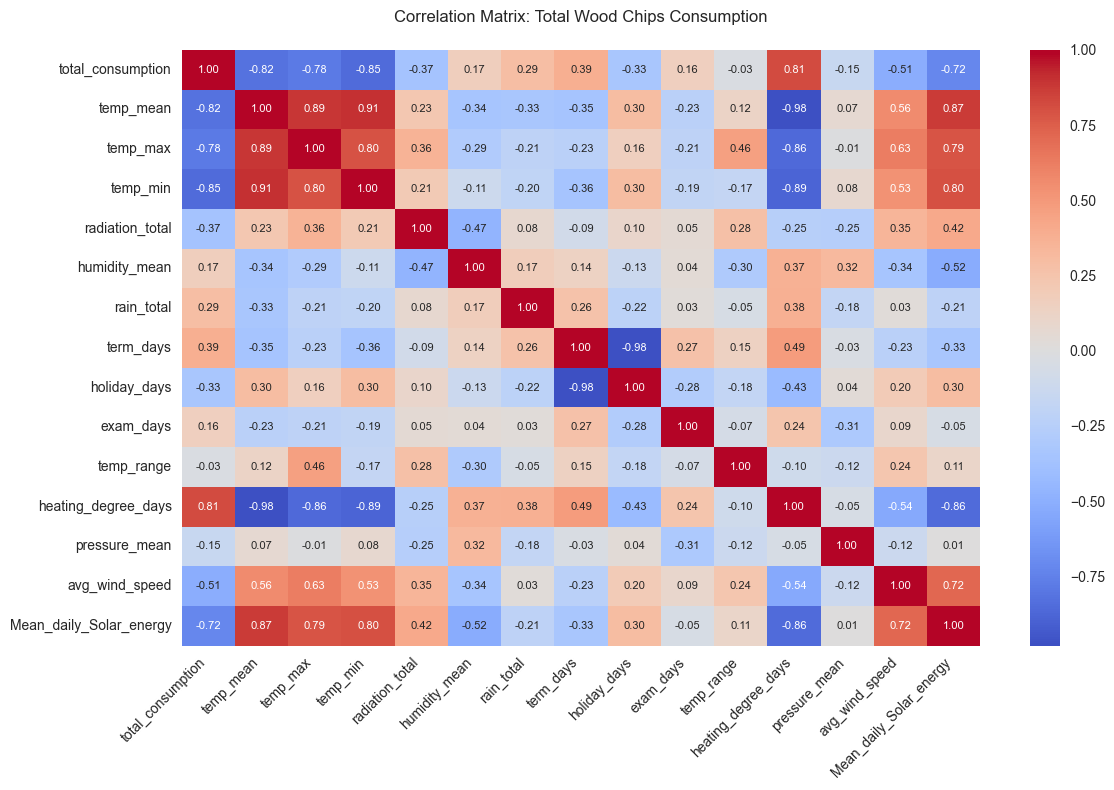

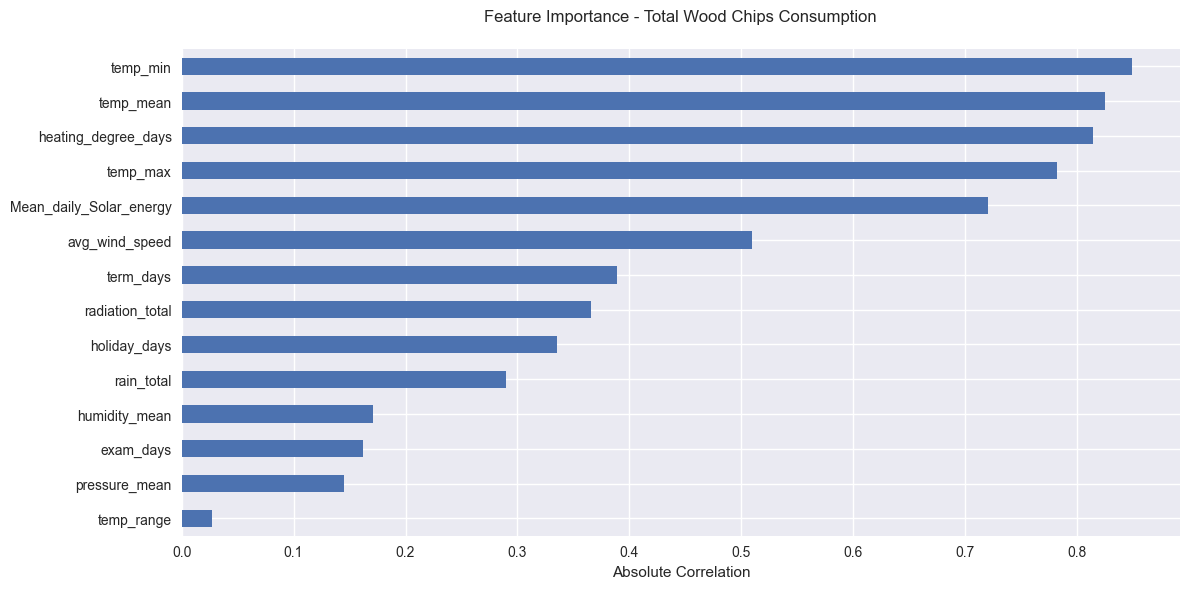


Feature Importance Rankings:
temp_min                  0.85
temp_mean                 0.82
heating_degree_days       0.81
temp_max                  0.78
Mean_daily_Solar_energy   0.72
avg_wind_speed            0.51
term_days                 0.39
radiation_total           0.37
holiday_days              0.33
rain_total                0.29
humidity_mean             0.17
exam_days                 0.16
pressure_mean             0.15
temp_range                0.03
dtype: float64


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path
import os

# Read the data

FILE_PATH = BASE_DIR / "backend/data/Cleaned/WoodChips.csv"
FILE_PATH = BASE_DIR / "backend/data/Cleaned/WoodChips.csv"
woodchips_df = pd.read_csv(FILE_PATH)

WEATHER_FILE_PATH = BASE_DIR / "backend/data/Weather/Load_weather_monthly.csv"
weather_df = pd.read_csv(WEATHER_FILE_PATH)

def prepare_woodchips_data():
    # Calculate total consumption across all buildings
    total_consumption = woodchips_df.iloc[:, 1:].sum()
    
    # Create a new dataframe with total consumption
    consumption_data = pd.DataFrame({
        'total_consumption': total_consumption.values
    })
    
    # Create month and year columns from the index
    dates = []
    for col in woodchips_df.columns[1:]:  # Skip 'object_name' column
        month, year = col.split('_')
        dates.append(pd.to_datetime(f"{year}-{month}-01"))
    
    consumption_data['date'] = dates
    
    return consumption_data

def create_features(df, weather_df):
    # Merge with weather data
    df = pd.merge(df, weather_df, 
                 left_on='date',
                 right_on=pd.to_datetime(weather_df['Year'].astype(str) + '-' + 
                                       weather_df['Month'].astype(str) + '-01'),
                 how='left')
    
    # Time-based features
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['season'] = pd.cut(df['date'].dt.month, 
                         bins=[0,3,6,9,12], 
                         labels=['Summer','Autumn','Winter','Spring'])
    
    # Academic calendar features
    df['is_term_time'] = df['term_days'] > 0
    df['is_holiday'] = df['holiday_days'] > 0
    df['is_exam_period'] = df['exam_days'] > 0
    
    # Temperature variation features
    df['temp_range'] = df['temp_max'] - df['temp_min']
    df['temp_std'] = df['temp_std_dev']
    
    # Heating degree days (base temperature 18°C)
    df['heating_degree_days'] = np.maximum(18 - df['temp_mean'], 0) * df['term_days']
    
    return df

def analyze_correlations(df):
    # Select numerical columns for correlation
    numerical_cols = ['total_consumption', 'temp_mean', 'temp_max', 'temp_min', 
                     'radiation_total', 'humidity_mean', 'rain_total',
                     'term_days', 'holiday_days', 'exam_days', 'temp_range',
                     'heating_degree_days', 'pressure_mean', 'avg_wind_speed',
                     'Mean_daily_Solar_energy']
    
    correlation_matrix = df[numerical_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                fmt='.2f',
                annot_kws={'size': 8})
    plt.title('Correlation Matrix: Total Wood Chips Consumption', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

def get_feature_importance(df):
    features = ['temp_mean', 'temp_max', 'temp_min', 'radiation_total', 
                'humidity_mean', 'rain_total', 'term_days', 'holiday_days',
                'exam_days', 'temp_range', 'heating_degree_days', 
                'pressure_mean', 'avg_wind_speed', 'Mean_daily_Solar_energy']
    
    importance = pd.Series(index=features, 
                          data=[abs(df['total_consumption'].corr(df[f])) 
                                for f in features])
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    importance.sort_values(ascending=True).plot(kind='barh')
    plt.title('Feature Importance - Total Wood Chips Consumption', pad=20)
    plt.xlabel('Absolute Correlation')
    plt.tight_layout()
    plt.show()
    
    return importance.sort_values(ascending=False)

# Main analysis
consumption_data = prepare_woodchips_data()
processed_data = create_features(consumption_data, weather_df)

# Correlation analysis
correlation_matrix = analyze_correlations(processed_data)

# Feature importance
importance = get_feature_importance(processed_data)
print("\nFeature Importance Rankings:")
print(importance)

/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_95990/337753917.py:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


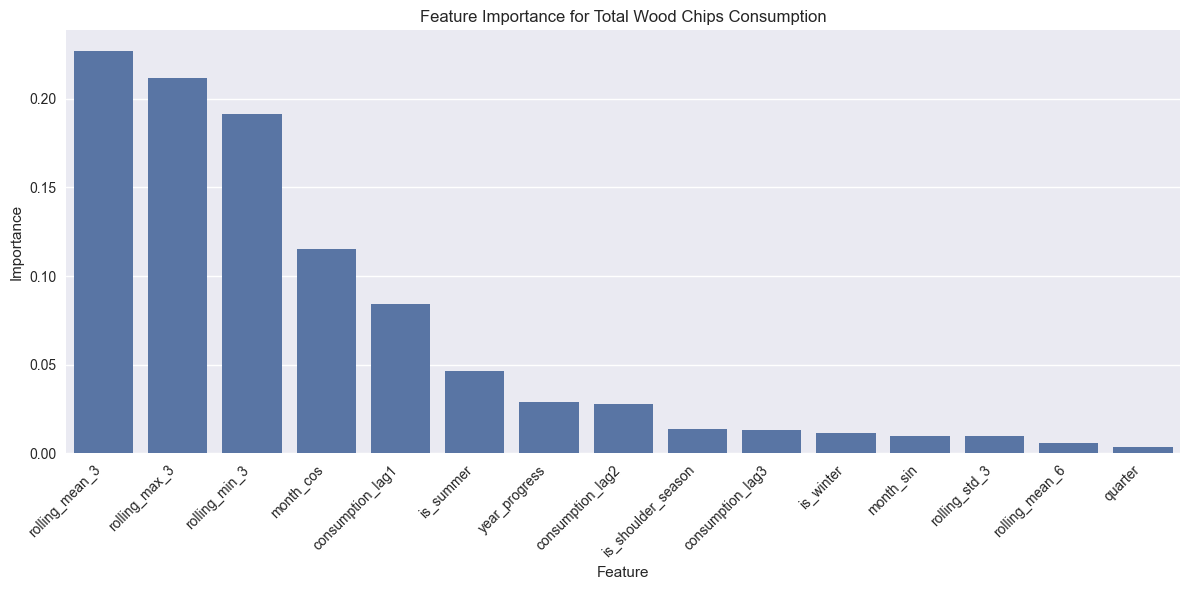

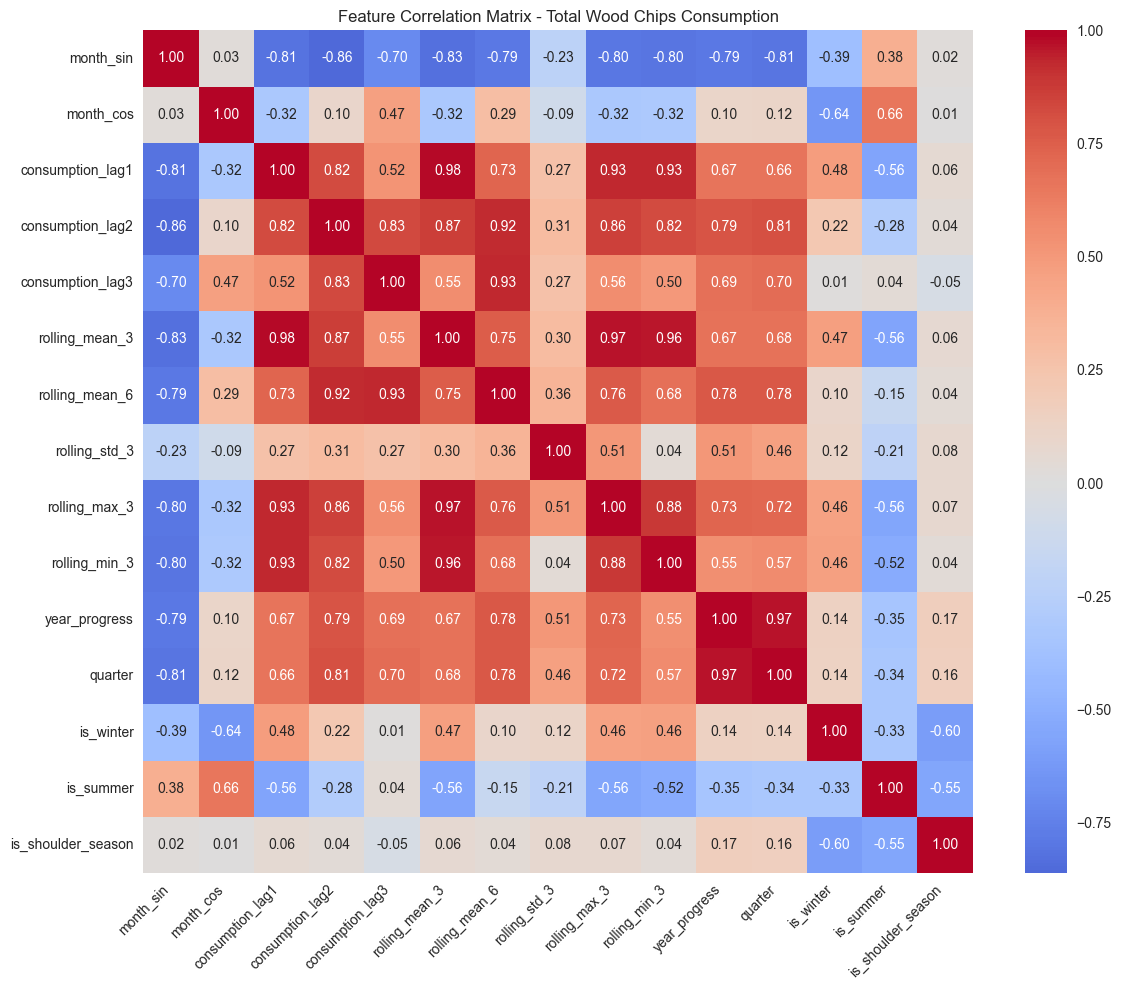

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def create_enhanced_features(woodchips_df):
    # Calculate total consumption across all buildings
    total_consumption = woodchips_df.iloc[:, 1:].sum()
    
    # Create base dataframe with dates
    df = pd.DataFrame()
    dates = []
    for col in woodchips_df.columns[1:]:
        month, year = col.split('_')
        dates.append(pd.to_datetime(f"{year}-{month}-01"))
    
    df['date'] = dates
    df['total_consumption'] = total_consumption.values
    
    # Basic time features
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['day_of_year'] = df['date'].dt.dayofyear
    
    # Cyclical encoding of months and days
    df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
    df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

    
    # Historical features
    df['consumption_lag1'] = df['total_consumption'].shift(1)
    df['consumption_lag2'] = df['total_consumption'].shift(2)
    df['consumption_lag3'] = df['total_consumption'].shift(3)
    
    # Rolling statistics
    df['rolling_mean_3'] = df['total_consumption'].rolling(3, min_periods=1).mean()
    df['rolling_mean_6'] = df['total_consumption'].rolling(6, min_periods=1).mean()
    df['rolling_std_3'] = df['total_consumption'].rolling(3, min_periods=1).std()
    df['rolling_max_3'] = df['total_consumption'].rolling(3, min_periods=1).max()
    df['rolling_min_3'] = df['total_consumption'].rolling(3, min_periods=1).min()
    
    # Seasonal features
    df['quarter'] = ((df['month'] - 1) // 3 + 1).astype(int)
    df['is_winter'] = df['month'].isin([6, 7, 8]).astype(int)
    df['is_summer'] = df['month'].isin([12, 1, 2]).astype(int)
    df['is_shoulder_season'] = (~df['month'].isin([6, 7, 8, 12, 1, 2])).astype(int)
    
    # Year-over-year features
    df['year_progress'] = (df['month'] - 1) / 11
    
    # Fill NaN values with appropriate methods
    df = df.fillna(method='bfill')
    
    return df

def analyze_enhanced_feature_importance(df):
    features = [
        'month_sin', 'month_cos', 
        'consumption_lag1', 'consumption_lag2', 'consumption_lag3',
        'rolling_mean_3', 'rolling_mean_6', 'rolling_std_3',
        'rolling_max_3', 'rolling_min_3', 'year_progress',
        'quarter', 'is_winter', 'is_summer', 'is_shoulder_season'
    ]
    
    X = df[features]
    y = df['total_consumption']
    
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Get feature importance
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    return importance, X

# Execute the analysis
enhanced_features = create_enhanced_features(woodchips_df)
importance, feature_matrix = analyze_enhanced_feature_importance(enhanced_features)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance, x='Feature', y='Importance')
plt.title('Feature Importance for Total Wood Chips Consumption')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot correlation matrix
correlation_matrix = feature_matrix.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix - Total Wood Chips Consumption')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, learning_curve
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_woodchips_data(woodchips_df, weather_df):
    """Prepare and merge woodchips and weather data"""
    # Calculate total consumption across all buildings
    total_consumption = woodchips_df.iloc[:, 1:].sum(axis=0)  # Sum across buildings
    
    # Create base dataframe with dates and consumption
    dates = []
    consumption_values = []
    for col in woodchips_df.columns[1:]:  # Skip 'object_name' column
        month, year = col.split('_')
        dates.append(pd.to_datetime(f"{year}-{month}-01"))
        consumption_values.append(total_consumption[col])
    
    df = pd.DataFrame({
        'date': dates,
        'total_consumption': consumption_values
    })
    
    # Create date column in weather data
    weather_df['date'] = pd.to_datetime(weather_df['Year'].astype(str) + '-' + 
                                      weather_df['Month'].astype(str) + '-01')
    
    # Merge data
    merged_data = pd.merge(df, weather_df, on='date', how='inner')
    merged_data = merged_data.sort_values('date')  # Ensure chronological order
    
    return merged_data

def prepare_weather_features(df):
    """Prepare weather-based features"""
    features = pd.DataFrame({
        #'Mean_daily_Solar_energy': df['Mean_daily_Solar_energy'],
        #'temp_mean': df['temp_mean'],
        'term_days': df['term_days'],
        #'humidity_mean': df['humidity_mean'],
        #'rain_total': df['rain_total']
    })
    # Handle missing values
    return features.fillna(features.mean())

def prepare_temporal_features(df):
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    month_num = df['Month'].map(month_map)
    
    features = pd.DataFrame({
        'rolling_mean_3': df['total_consumption'].rolling(window=3, min_periods=3).mean(),
        #'rolling_mean_12': df['total_consumption'].rolling(window=12, min_periods=3).mean(),
        #'rolling_mean_6': df['total_consumption'].rolling(window=6, min_periods=1).mean(),
        #'rolling_std_3': df['total_consumption'].rolling(window=3, min_periods=1).std(),
        #'rolling_std_6': df['total_consumption'].rolling(window=6, min_periods=1).std(),
        #'consumption_lag1': df['total_consumption'].shift(1),
        #'consumption_lag2': df['total_consumption'].shift(3),
        #'month_cos': np.cos(2 * np.pi * month_num/12),
        #'month_sin': np.sin(2 * np.pi * month_num/12),
        #'year': df['Year']
    })
    
    '''
    # Add season dummies
    features['season'] = month_num.apply(lambda x: 'Summer' if x in [12,1,2] 
                                       else 'Autumn' if x in [3,4,5]
                                       else 'Winter' if x in [6,7,8]
                                       else 'Spring')
    season_dummies = pd.get_dummies(features['season'], prefix='season')
    features = pd.concat([features.drop('season', axis=1), season_dummies], axis=1)
    '''
    return features.fillna(method='bfill')

def evaluate_model(model, X, y, model_name):
    """Evaluate model performance"""
    X = np.nan_to_num(X, nan=np.nanmean(X))
    y = np.nan_to_num(y, nan=np.nanmean(y))
    
    tscv = TimeSeriesSplit(n_splits=5, test_size=5)
    scores = {
        'train_r2': [], 'test_r2': [], 
        'train_rmse': [], 'test_rmse': []
    }
    
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        
        scores['train_r2'].append(r2_score(y_train, y_train_pred))
        scores['test_r2'].append(r2_score(y_test, y_test_pred))
        scores['train_rmse'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        scores['test_rmse'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    print(f"\nResults for {model_name}:")
    print(f"Train R²: {np.mean(scores['train_r2']):.4f} (+/- {np.std(scores['train_r2']):.4f})")
    print(f"Test R²: {np.mean(scores['test_r2']):.4f} (+/- {np.std(scores['test_r2']):.4f})")
    print(f"Train RMSE: {np.mean(scores['train_rmse']):.2f}")
    print(f"Test RMSE: {np.mean(scores['test_rmse']):.2f}")
    
    return scores

def plot_learning_curve(model, X, y, title):
    """Plot learning curve for Lasso model"""
    X = np.nan_to_num(X, nan=np.nanmean(X))
    train_sizes = np.linspace(0.1, 1.0, 10)
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=3, scoring='r2'
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('R² Score')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

def plot_actual_vs_predicted(model, X, y, title):
    """Plot actual vs predicted values"""
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Steam Consumption (kWh)')
    plt.ylabel('Predicted Steam Consumption (kWh)')
    plt.title(title)
    plt.grid(True)
    plt.show()

woodchips_df = pd.read_csv(FILE_PATH)
weather_df = pd.read_csv(WEATHER_FILE_PATH)

# Prepare data
merged_data = prepare_woodchips_data(woodchips_df, weather_df)

# Prepare features
X_weather = prepare_weather_features(merged_data)
X_temporal = prepare_temporal_features(merged_data)
y = merged_data['total_consumption']

# Scale features
scaler = StandardScaler()
X_weather_scaled = scaler.fit_transform(X_weather)
X_temporal_scaled = scaler.fit_transform(X_temporal)
X_combined = np.hstack([X_weather_scaled, X_temporal_scaled])

# Define models
models = {
    'Lasso': Lasso(alpha=.001, max_iter=2000),
    'Ridge': Ridge(alpha=.01,max_iter=2000),
    #'LinearRegression': LinearRegression()
}

# Evaluate models
for name, model in models.items():
    print(f"\nEvaluating {name}")
    print("="*50)
    #print("\nWeather Features:")
    #evaluate_model(model, X_weather_scaled, y, f"{name} (Weather Features)")
    print("\nTemporal Features:")
    evaluate_model(model, X_temporal_scaled, y, f"{name} (Temporal Features)")
    #print("\nCombined Features:")
    #evaluate_model(model, X_combined, y, f"{name} (Combined Features)")

# Focus on Lasso Regression
#lasso = Lasso(alpha=1)
#lasso.fit(X_temporal_scaled, y)

# Plot learning curves and actual vs predicted
#plot_learning_curve(lasso, X_weather_scaled, y, "Lasso Regression Learning Curve (Weather Features)")
#plot_learning_curve(lasso, X_temporal_scaled, y, "Lasso Regression Learning Curve (Temporal Features)")
#plot_learning_curve(lasso, X_combined, y, "Lasso Regression Learning Curve (Combined Features)")
#plot_actual_vs_predicted(lasso, X_temporal_scaled, y, "Lasso Regression: Actual vs Predicted (Temporal Features)")


Evaluating Lasso

Temporal Features:

Results for Lasso (Temporal Features):
Train R²: 0.9244 (+/- 0.0077)
Test R²: 0.1236 (+/- 1.3898)
Train RMSE: 63711.68
Test RMSE: 79918.16

Evaluating Ridge

Temporal Features:

Results for Ridge (Temporal Features):
Train R²: 0.9244 (+/- 0.0077)
Test R²: 0.1212 (+/- 1.3924)
Train RMSE: 63712.32
Test RMSE: 80043.79


/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_95990/753513621.py:80: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return features.fillna(method='bfill')
/Users/dhanarajrajasekaran/uems_project_clean/backend/venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.768e+08, tolerance: 7.703e+07
  model = cd_fast.enet_coordinate_descent(
/Users/dhanarajrajasekaran/uems_project_clean/backend/venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+08, tolerance: 

/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_95990/3925515825.py:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return features.fillna(method='bfill')


Fitting 5 folds for each of 486 candidates, totalling 2430 fits

Best Parameters: {'bootstrap': False, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best CV Score: -0.20763710434992913

Final Model Results:
Train R²: 0.6763 (+/- 0.3443)
Test R²: -0.2076 (+/- 0.9954)
Train RMSE: 86555.92
Test RMSE: 109737.69


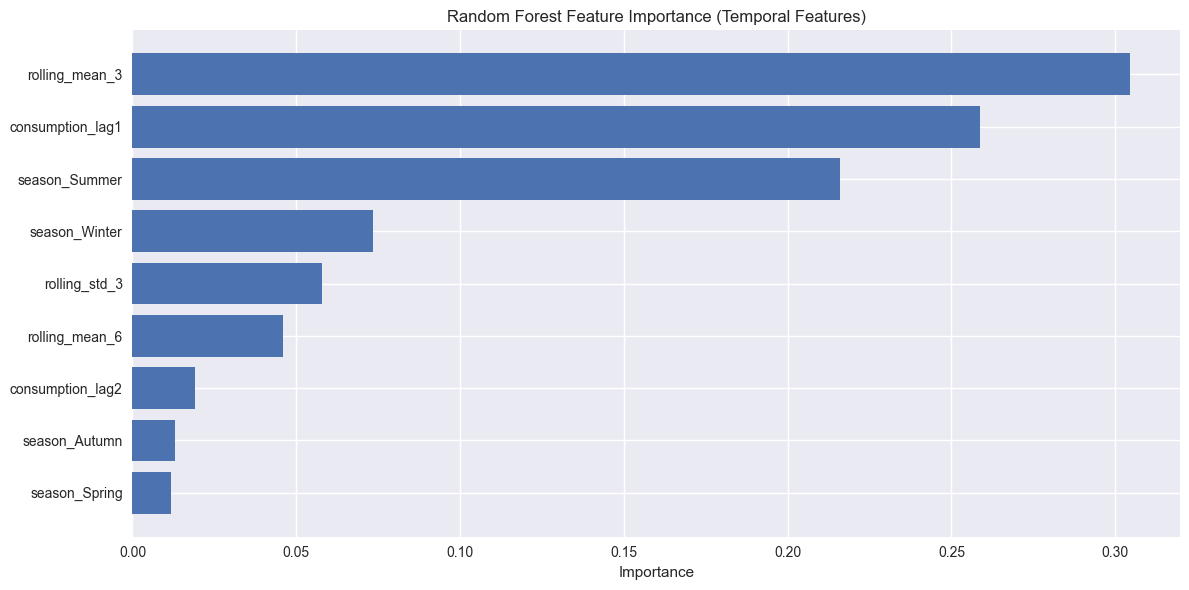

In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def prepare_woodchips_data(woodchips_df):
    """Prepare and merge woodchips and weather data"""
    # Calculate total consumption across all buildings
    total_consumption = woodchips_df.iloc[:, 1:].sum(axis=0)  # Sum across buildings
    
    # Create base dataframe with dates and consumption
    dates = []
    consumption_values = []
    for col in woodchips_df.columns[1:]:  # Skip 'object_name' column
        month, year = col.split('_')
        dates.append(pd.to_datetime(f"{year}-{month}-01"))
        consumption_values.append(total_consumption[col])
    
    df = pd.DataFrame({
        'date': dates,
        'total_consumption': consumption_values
    })
    return df

def prepare_temporal_features(df):
    
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    month_num = df['month'].map(month_map)
    
    features = pd.DataFrame({
        'rolling_mean_3': df['total_consumption'].rolling(window=3, min_periods=1).mean(),
        #'rolling_mean_12': df['total_consumption'].rolling(window=12, min_periods=3).mean(),
        'rolling_mean_6': df['total_consumption'].rolling(window=6, min_periods=1).mean(),
        'rolling_std_3': df['total_consumption'].rolling(window=3, min_periods=1).std(),
        #'rolling_std_6': df['total_consumption'].rolling(window=6, min_periods=6).std(),
        'consumption_lag1': df['total_consumption'].shift(1),
        'consumption_lag2': df['total_consumption'].shift(2),
        #'month_cos': np.cos(2 * np.pi * month_num/12),
        #'month_sin': np.sin(2 * np.pi * month_num/12),
        #'year': df['year']
    })
    
    
    # Add season dummies
    features['season'] = df['month'].apply(lambda x: 'Summer' if x in [12,1,2] 
                                         else 'Autumn' if x in [3,4,5]
                                         else 'Winter' if x in [6,7,8]
                                         else 'Spring')
    season_dummies = pd.get_dummies(features['season'], prefix='season')
    features = pd.concat([features.drop('season', axis=1), season_dummies], axis=1)
    
    return features.fillna(method='bfill')

def build_rf_temporal_model(merged_data):
    # Prepare temporal features
    features = prepare_temporal_features(merged_data)
    y = merged_data['total_consumption']
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)
    X_scaled = pd.DataFrame(X_scaled, columns=features.columns)
    
    # Define hyperparameter grid
    param_grid = {
        'n_estimators': [20, 30, 50],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False]
    }
    
    # Initialize Random Forest
    rf = RandomForestRegressor(random_state=42)
    
    # Time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5, test_size=5)
    
    # Grid search with time series CV
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=tscv,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit grid search
    grid_search.fit(X_scaled, y)
    
    # Print best parameters and score
    print("\nBest Parameters:", grid_search.best_params_)
    print("Best CV Score:", grid_search.best_score_)
    
    # Train final model with best parameters
    best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
    
    # Evaluate using time series CV
    scores = {
        'train_r2': [], 'test_r2': [],
        'train_rmse': [], 'test_rmse': []
    }
    
    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        best_rf.fit(X_train, y_train)
        
        y_train_pred = best_rf.predict(X_train)
        y_test_pred = best_rf.predict(X_test)
        
        scores['train_r2'].append(r2_score(y_train, y_train_pred))
        scores['test_r2'].append(r2_score(y_test, y_test_pred))
        scores['train_rmse'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        scores['test_rmse'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    # Print final results
    print("\nFinal Model Results:")
    print(f"Train R²: {np.mean(scores['train_r2']):.4f} (+/- {np.std(scores['train_r2']):.4f})")
    print(f"Test R²: {np.mean(scores['test_r2']):.4f} (+/- {np.std(scores['test_r2']):.4f})")
    print(f"Train RMSE: {np.mean(scores['train_rmse']):.2f}")
    print(f"Test RMSE: {np.mean(scores['test_rmse']):.2f}")
    
    # Plot feature importance
    feature_importance = pd.DataFrame({
        'Feature': features.columns,
        'Importance': best_rf.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    plt.figure(figsize=(12, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.title('Random Forest Feature Importance (Temporal Features)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    return best_rf, scores, grid_search

woodchips_df = pd.read_csv(FILE_PATH)

woodchips_new =prepare_woodchips_data(woodchips_df)

# Call the function
rf_model, rf_scores, grid_search = build_rf_temporal_model(woodchips_new)